# Задание 1. Исследование набора данных

## Датасет

Этот набор данных содержит почасовое количество арендованных велосипедов в период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах.

Источник данных - [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset).

Используются реальные данные.

### Атрибуты

| Атрибут    | Тип                   | Характеристика                                                                                                                | Возможные значения                                                                                                                                                                                                                                                                                                                                            |      
|------------|-----------------------|-------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------| 
| instant    | числовой              | Индекс записи                                                                                                                 |                                                                                                                                                                                                                                                                                                                                                               |
| dteday     | строковый (дата)      | Дата                                                                                                                          |                                                                                                                                                                                                                                                                                                                                                               |
| season     | численный (категории) | Время года                                                                                                                    | 1 - зима, 2 - весна, 3 - лето, 4 - осень                                                                                                                                                                                                                                                                                                                      | 
| yr         | численный             | Год                                                                                                                           | 0 - 2011, 1 - 2012                                                                                                                                                                                                                                                                                                                                            |
| mnth       | численный             | Месяц                                                                                                                         | 1-12                                                                                                                                                                                                                                                                                                                                                          |
| hr         | численный             | Час                                                                                                                           | 0-23                                                                                                                                                                                                                                                                                                                                                          |
| holiday    | численный (булевый)   | Выходной                                                                                                                      | 1 - выходной, 0 - нет                                                                                                                                                                                                                                                                                                                                         |
| weekday    | численный             | День недели                                                                                                                   | 1-7                                                                                                                                                                                                                                                                                                                                                           |
| workingday | численный (булевый)   | Рабочий день                                                                                                                  | 1 - рабочий день, 0 - выходной или праздник                                                                                                                                                                                                                                                                                                                   |
| weathersit | численный (категории) | Погода                                                                                                                        | 1 - Ясно, малооблачно, Переменная облачность, Переменная облачность без осадков, <br/>2 - Туман + Облачно, Туман + Разорванные облака, Туман + Несколько облаков, Туман, <br/>3 - Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + рассеянные облака, <br/>4 - Сильный дождь + Ледяные гранулы + Гроза + Туман, Снег + Туманная |
| temp       | численный             | Нормированная температура в Цельсиях. Значения посчитаны как (t-t_min) / (t_max-t_min), t_min = -8, t_max = +39               |                                                                                                                                                                                                                                                                                                                                                               |
| atemp      | численный             | Нормированная температура по ощущениям в Цельсиях. Значения посчитаны как (t-t_min) / (t_max-t_min), t_min = -16, t_max = +50 |                                                                                                                                                                                                                                                                                                                                                               |
| hum        | численный             | Нормированная влажность. Значения поделены на 100 (max)                                                                       |                                                                                                                                                                                                                                                                                                                                                               |
| windspeed  | численный             | Нормированная скорость ветра. Значения поделены на 67 (max)                                                                   |                                                                                                                                                                                                                                                                                                                                                               |
| casual     | численный             | Количество постоянных пользователей                                                                                           |                                                                                                                                                                                                                                                                                                                                                               |
| registered | численный             | Количество зарегистрированных пользователей                                                                                   |                                                                                                                                                                                                                                                                                                                                                               |
| cnt        | численный             | Количество взятых напрокат велосипедов, включая постоянных и зарегистрированных пользователей                                 |                                                                                                                                                                                                                                                                                                                                                               |


### Задача анализа

TODO: 

## Преобразование датасета

In [1]:
import pandas as pd

In [90]:
df = pd.read_csv("../data/hour.csv")

Переименуем колонки в читаемый формат

In [91]:
df = df.rename(columns = {
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "count"
});

Удалим столбец с индексом `instant`, поскольку Pandas осуществляет индексирование самостоятельно.

In [92]:
df.drop(["instant"], axis=1, inplace=True)

Удалим столбцы `year` и `date`, посколько нас не интересует год, а для анализа даты достаточно других данных - месяца, дня недели, выходного.

In [93]:
df.drop(["year", "date"], axis=1, inplace=True)

После всех преобразований получаем таблицу вида

In [94]:
df.head()

,season,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Анализ датасета

Для каждого атрибута численного и булевого типа определим:
1. Среднее значение
2. СКО


In [104]:
pd.DataFrame({
    "mean": df.mean(),
    "std": df.std()
})

,mean,std
season,2.501640,1.106918
month,6.537775,3.438776
hour,11.546752,6.914405
holiday,0.028770,0.167165
weekday,3.003683,2.005771
workingday,0.682721,0.465431
weathersit,1.425283,0.639357
temp,0.496987,0.192556
atemp,0.475775,0.171850
hum,0.627229,0.192930


Построим гистограмму распределения значений

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

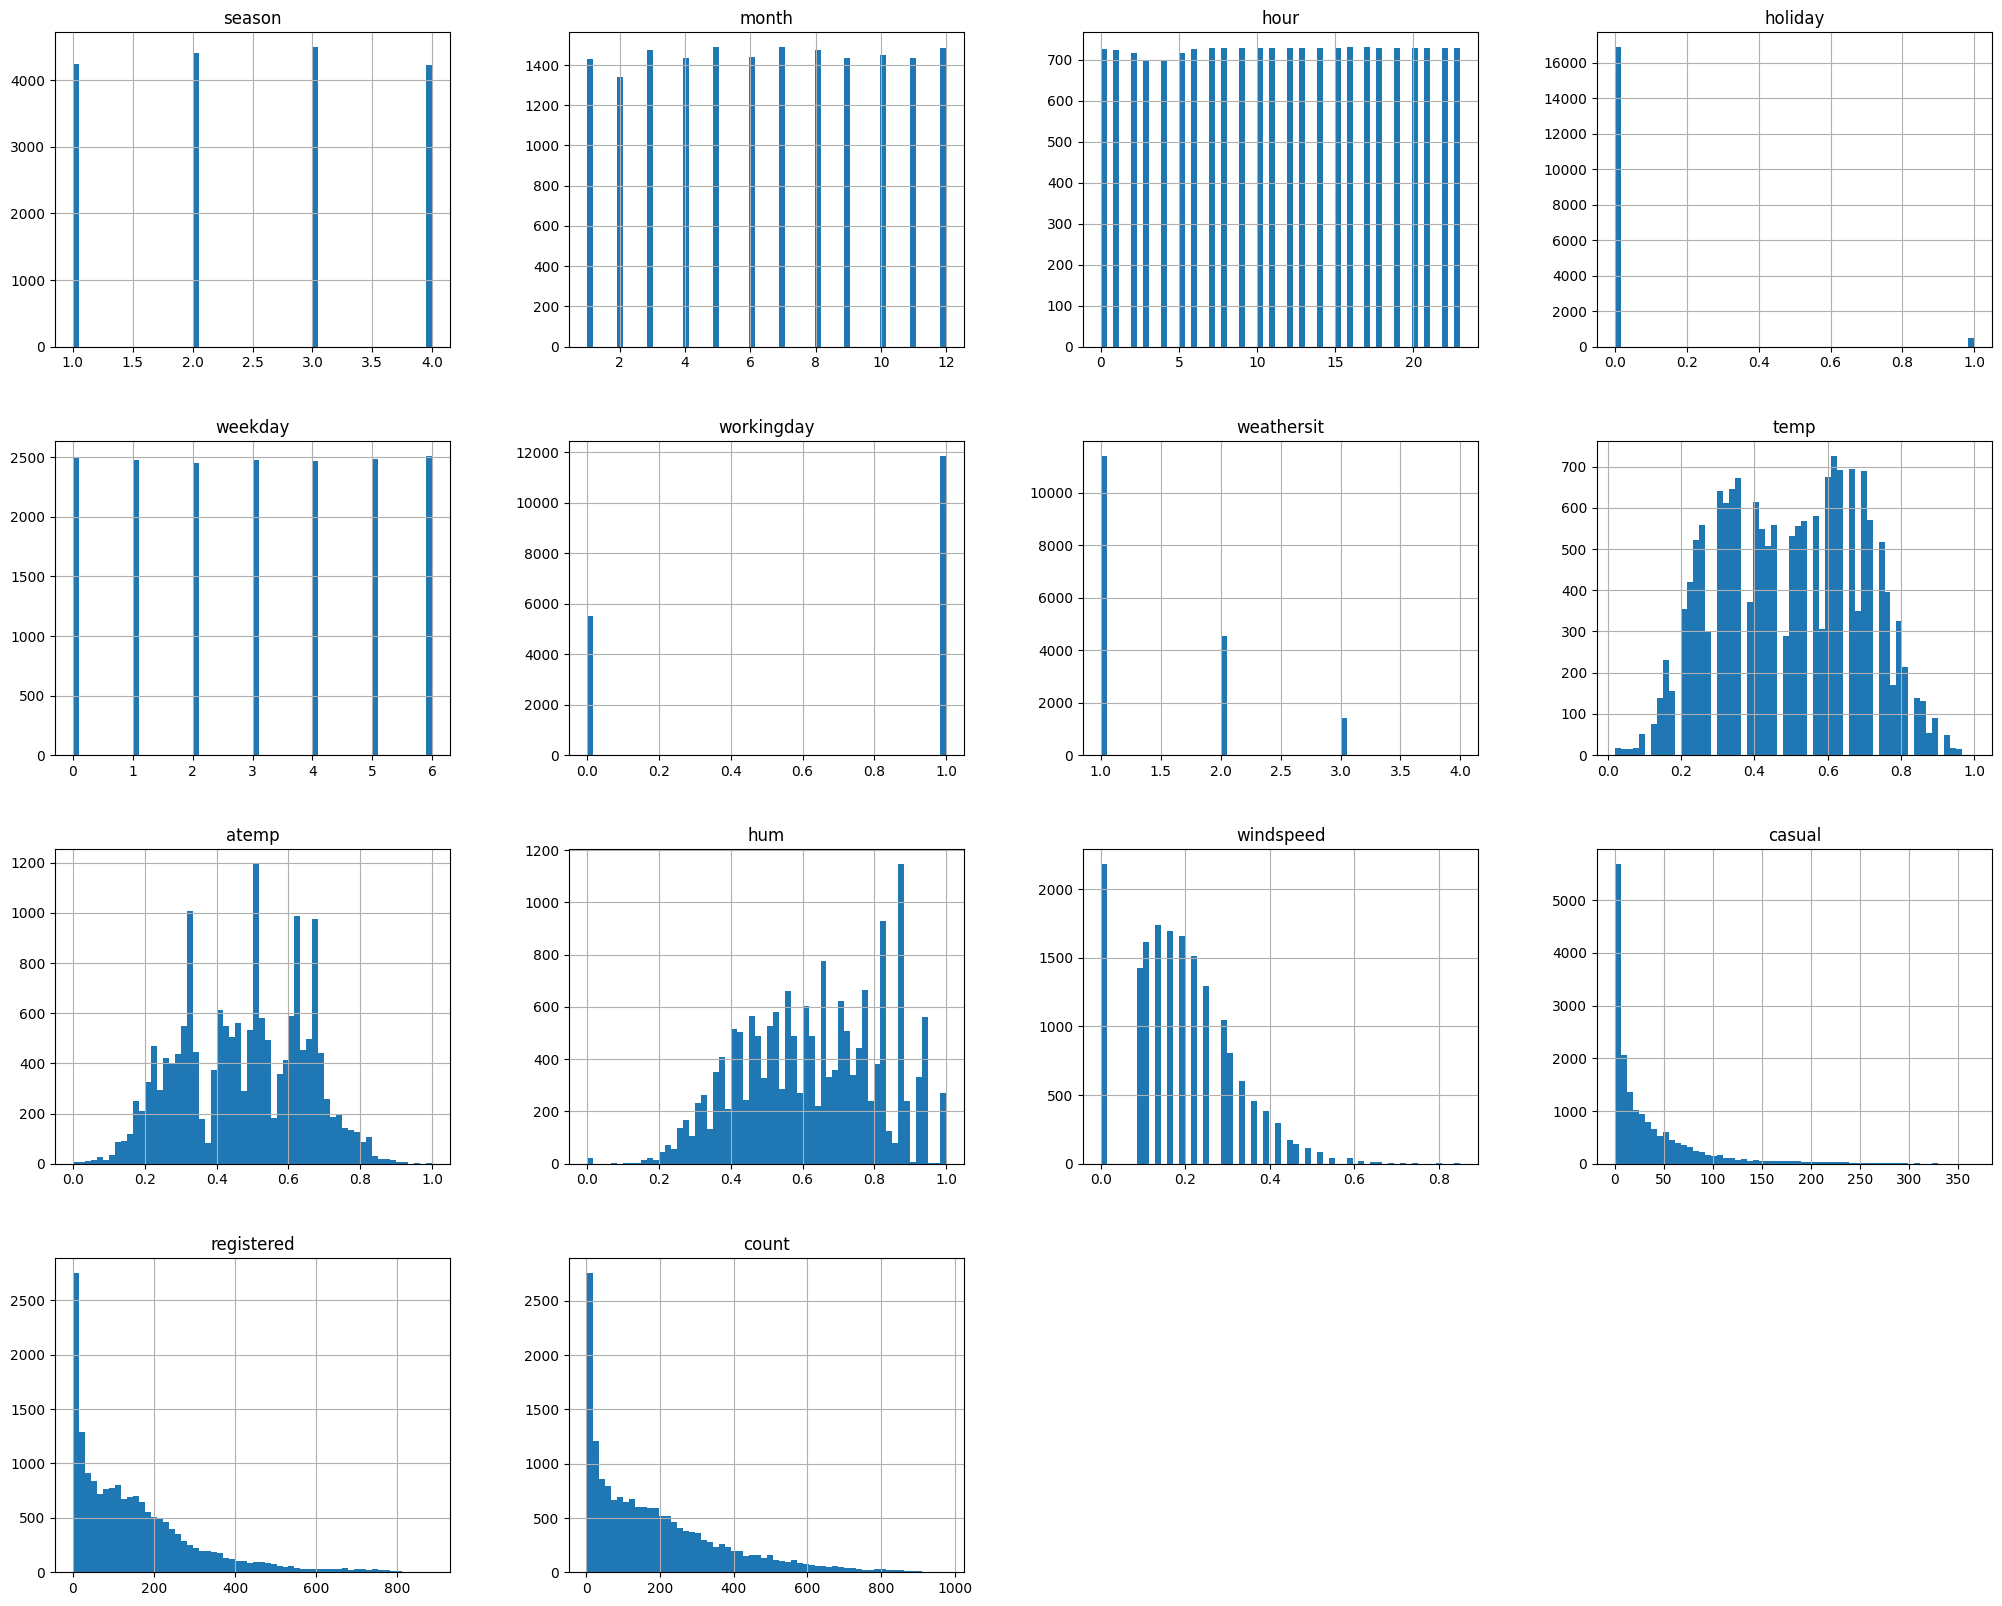

In [105]:
df.hist(bins=60, figsize=(25, 20));

Определим наличие выбросов с помощью метода межквартильного диапазона (IQR).

Будем считать наблюдение выбросом, если его значение в 1,5 раза больше (меньше) IQR.

In [106]:
threshold = 1.5
outliers = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)].size

In [107]:
pd.DataFrame({
    "outliers": outliers
})

,outliers
atemp,0
casual,16688
count,7070
holiday,7000
hour,0
hum,308
month,0
registered,9520
season,0
temp,0


Определим, содержит ли датасет пропущенные значения. Для этого вычислим строки, содержащие хотя бы 1 пропущенное значение (`None`, `numpy.NaN`)

In [109]:
(df.isna().sum(axis = 1) > 0).sum()

0

Датасет не содержит выбросов, о чем так же сказано в его описании.

> **Has Missing Values?**
> 
> No


### Корреляция между параметрами